<a href="https://colab.research.google.com/github/AlejandroMllo/UAV-Human-Influence-Detection/blob/master/Laguerre_Gauss_Filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

import cmath
import math

### Auxiliary Functions

In [0]:
vectorized_phase = np.vectorize(cmath.phase)
vectorized_amplitude = np.vectorize(abs)

def make_displayable(img):
  
  f_bounded = 20 * np.log(img)
  f_img = 255 * f_bounded / np.max(f_bounded)
  f_img = f_img.astype(np.uint8)
  
  return f_img

# Laguerre-Gauss Filter

In [0]:
def laguerre_gauss_filter(side_size, w):
  """
  Computes and returns a matrix containing the Laguerre-Gauss filter.
  """
  
  scale = (1.j * math.pow(math.pi, 2) * math.pow(w, 4))
  # Not sure is `scale` is the appropriate name
  power_scale = -math.pow(math.pi, 2) * math.pow(w, 2)
  # Not sure if `power_scale` is the appropriate name
  
  filter = np.zeros((side_size, side_size), dtype=complex)
  
  for x in range(side_size):
    x_squared = math.pow(x, 2)
    for y in range(side_size):
      power = cmath.exp(power_scale * (x_squared + math.pow(y, 2)))
      
      filter[x, y] = scale * complex(x, y) * power
    # print('Coord:', x, y, scale * complex(x, y) * power)
      
  return filter

## Filter Validation

In [0]:
lg_512 = laguerre_gauss_filter(512, 0.05)

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
lenna = cv2.imread('drive/My Drive/Lenna_(test_image).png', cv2.IMREAD_GRAYSCALE)

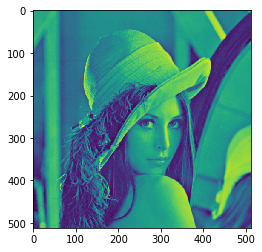

In [7]:
plt.imshow(lenna)

### Filter and Image Fourier Transform

In [0]:
ft_lg_512 = np.fft.fft2(lg_512)
ft_lenna = np.fft.fft2(lenna)

#### Shift Fourier Transform

Zero-frequency component is shifted to the center of the spectrum.

In [0]:
ft_lenna_shifted = np.fft.fftshift(ft_lenna)
ft_lg_512_shifted = np.fft.fftshift(ft_lg_512)

### Convolution: Element-wise multiplication of Fourier Transforms

In [0]:
convolution = np.multiply(ft_lg_512_shifted, ft_lenna_shifted)
# convolution = np.multiply(lg_512, ft_lenna_shifted)

#### Phase

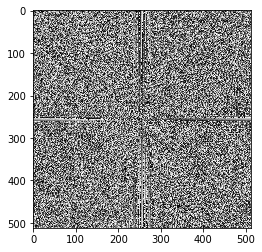

In [11]:
ph_conv = vectorized_phase(convolution)
# ph_conv = make_displayable(ph_conv)

plt.imshow(ph_conv, cmap='gray')

#### Amplitude

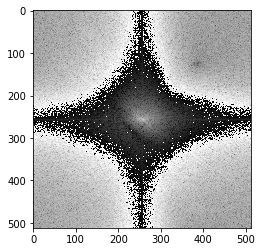

In [12]:
conv_amp = vectorized_amplitude(convolution)
conv_amp = make_displayable(conv_amp)

plt.imshow(conv_amp, cmap='gray')

## Get Phase Spiral and Toroidal

### Phase

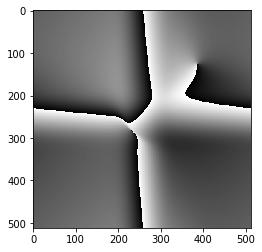

In [13]:
ph = vectorized_phase(ft_lg_512_shifted)
plt.imshow(ph, cmap='gray')

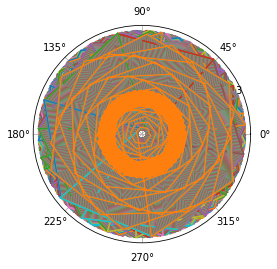

In [21]:
plt.polar(ph)

### Toroidal

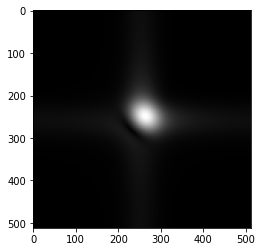

In [15]:
am = vectorized_amplitude(ft_lg_512_shifted)
plt.imshow(am, cmap='gray')

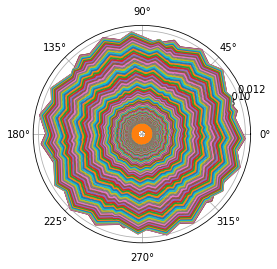

In [20]:
plt.polar(am)